# AI-Powered Fraud Detection in Financial Transactions

### Problem Statement:
Financial fraud is increasing rapidly, and traditional rule-based systems fail to detect complex fraud patterns.  Fraudsters use fake identities, stolen devices, and bots.

### Objective:
Build an ML-based fraud detection system using transaction and identity data.
Detect fraud accurately and explain predictions.
Enable real-time fraud alert system for financial applications.

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
df_trans = pd.read_csv('train_transaction.csv')

In [3]:
df_trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_iden = pd.read_csv('train_identity.csv')
df_iden

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [5]:
df = df_trans.merge(df_iden, how='left')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [6]:
df.shape

(590540, 434)

In [7]:
def df_dtypes(df):
    pd.set_option('display.max_colwidth', None)
    # Group columns by their data types
    df_dtypes = df.columns.to_series().groupby(df.dtypes.astype(str)).apply(list).reset_index()
    df_dtypes.columns = ['dtype', 'columns']
    # Add a column for the number of columns
    df_dtypes['# columns'] = df_dtypes['columns'].apply(len)
    # Reorder columns
    df_dtypes = df_dtypes[['dtype', '# columns', 'columns']]
    # Apply styling
    df_dtypes = df_dtypes.style.set_properties(subset=['columns'], **{'text-align': 'left'})
    return df_dtypes

In [8]:
df_dtypes(df)

,dtype,# columns,columns
0,float64,399,"['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']"
1,int64,4,"['TransactionID', 'isFraud', 'TransactionDT', 'card1']"
2,object,31,"['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']"


## Data Cleaning

In [9]:
def null_percentage(df):
    null_percentages = (df.isnull().sum() / len(df)) * 100
    null_df = pd.DataFrame({'Column': null_percentages.index, 'Null_Percentage': null_percentages.values})
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 2000)  # Prevents wrapping
    pd.set_option('display.max_colwidth', None)  # Show full column names/content
    return null_df

In [10]:
null_percentages = null_percentage(df)

In [11]:
null_percentages

,Column,Null_Percentage
0,TransactionID,0.000000
1,isFraud,0.000000
2,TransactionDT,0.000000
3,TransactionAmt,0.000000
4,ProductCD,0.000000
...,...,...
429,id_36,76.126088
430,id_37,76.126088
431,id_38,76.126088
432,DeviceType,76.155722


In [12]:
threshold = 0.2  
cleaned_df = df.loc[:, df.isnull().mean() < threshold]  

print(f"Original shape: {df.shape}")
print(f"New shape after dropping high-null columns: {cleaned_df.shape}")


Original shape: (590540, 434)
New shape after dropping high-null columns: (590540, 182)


In [13]:
null_percentages_cleaned_df = null_percentage(cleaned_df)

In [14]:
null_percentages_cleaned_df

,Column,Null_Percentage
0,TransactionID,0.000000
1,isFraud,0.000000
2,TransactionDT,0.000000
3,TransactionAmt,0.000000
4,ProductCD,0.000000
...,...,...
177,V317,0.002032
178,V318,0.002032
179,V319,0.002032
180,V320,0.002032


### Data Dictionary

- **TransactionID**: Unique identifier for each transaction.
- **isFraud**: Target variable indicating whether a transaction is fraudulent (1) or not (0).
- **TransactionDT**: The timestamp of the transaction.
- **TransactionAmt**: The amount of the transaction.
- **ProductCD**: The product code for the transaction, indicating the type of product involved.
- **card1, card2, card3, ..., card6**: Information related to the credit card used for the transaction, such as card type, issuing bank, etc.
- **addr1, addr2**: Address-related information, likely the location of the cardholder.
- **dist1**: Distance metric or feature related to the cardholder's location.
- **P_emaildomain**: The email domain of the user (could indicate a personal or company email).
- **C1, C2, ..., C14**: Various features related to the transaction or user, possibly categorical or numerical features derived from the transaction.
- **D1, D2, ..., D5, D10, D11, D15**: These could be features related to the difference between this transaction and previous transactions.
- **M1, M2, ..., M9**: Likely flags or metrics for metadata related to the transaction, such as metadata regarding the user or device.
- **V1, V2, ..., V317**: These could represent engineered features, possibly anonymized or transformed features designed to capture patterns of fraud without revealing sensitive data.


Transaction ID is of no use in further analysis

In [15]:
cleaned_df.drop(columns=['TransactionID'],inplace=True)

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/1450277796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=['TransactionID'],inplace=True)


In [16]:
cleaned_df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 181 entries, isFraud to V321
dtypes: float64(174), int64(3), object(4)
memory usage: 815.5+ MB


In [18]:
def extract_date_features(df, date_columns):
    for feature in date_columns:
        df[feature] = pd.to_datetime(df[feature], errors='coerce')
        df[feature + '_year']         = df[feature].dt.year.astype('int64')
        df[feature + '_month']        = df[feature].dt.month.astype('int64')
        df[feature + '_day']          = df[feature].dt.day.astype('int64')
        df[feature + '_weekday']      = df[feature].dt.weekday.astype('int64')
        df[feature + '_weekofyear']   = df[feature].dt.isocalendar().week.astype('int64')
        df[feature + '_quarter']      = df[feature].dt.quarter.astype('int64')
        df[feature + '_isweekend']    = df[feature + '_weekday'].isin([5, 6]).astype('int64')
        df[feature + '_isleapyear']   = df[feature].dt.is_leap_year.astype('int64')
        df[feature + '_ismonthend']   = df[feature].dt.is_month_end.astype('int64')
        df[feature + '_ismonthstart'] = df[feature].dt.is_month_start.astype('int64')
        df[feature + '_season']       = (df[feature].dt.month % 12 // 3 + 1).map({
                                          1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'
                                         }).astype('object')
    return df

In [19]:
cleaned_df['TransactionDT'] = pd.to_datetime(cleaned_df['TransactionDT'], errors='coerce')
cleaned_df['TransactionDT' + '_year'] = cleaned_df['TransactionDT'].dt.year.astype('int64')

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/2378629065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['TransactionDT'] = pd.to_datetime(cleaned_df['TransactionDT'], errors='coerce')
/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/2378629065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['TransactionDT' + '_year'] = cleaned_df['TransactionDT'].dt.year.astype('int64')


In [20]:
cleaned_df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,TransactionDT_year
0,0,1970-01-01 00:00:00.000086400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,1970
1,0,1970-01-01 00:00:00.000086401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970
2,0,1970-01-01 00:00:00.000086469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1970
3,0,1970-01-01 00:00:00.000086499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,1758.0,925.0,0.0,354.0,135.0,50.0,1404.0,790.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.

In [21]:
cleaned_df['TransactionDT'+ '_month']        = cleaned_df['TransactionDT'].dt.month.astype('int64')
cleaned_df['TransactionDT' + '_day']          = cleaned_df['TransactionDT'].dt.day.astype('int64')
cleaned_df['TransactionDT' + '_weekday']      = cleaned_df['TransactionDT'].dt.weekday.astype('int64')
cleaned_df['TransactionDT' + '_weekofyear']   = cleaned_df['TransactionDT'].dt.isocalendar().week.astype('int64')
cleaned_df['TransactionDT' + '_quarter']      = cleaned_df['TransactionDT'].dt.quarter.astype('int64')
cleaned_df['TransactionDT' + '_isweekend']    = cleaned_df['TransactionDT'+ '_weekday'].isin([5, 6]).astype('int64')
cleaned_df['TransactionDT' + '_isleapyear']   = cleaned_df['TransactionDT'].dt.is_leap_year.astype('int64')
cleaned_df['TransactionDT' + '_ismonthend']   = cleaned_df['TransactionDT'].dt.is_month_end.astype('int64')
cleaned_df['TransactionDT' + '_ismonthstart'] = cleaned_df['TransactionDT'].dt.is_month_start.astype('int64')
cleaned_df['TransactionDT' + '_season']       = (cleaned_df['TransactionDT'].dt.month % 12 // 3 + 1).map({
                                    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'
                                    }).astype('object')

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/688159956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['TransactionDT'+ '_month']        = cleaned_df['TransactionDT'].dt.month.astype('int64')
/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/688159956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['TransactionDT' + '_day']          = cleaned_df['TransactionDT'].dt.day.astype('int64')
/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_

In [22]:
cleaned_df.sample(200)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,TransactionDT_year,TransactionDT_month,TransactionDT_day,TransactionDT_weekday,TransactionDT_weekofyear,TransactionDT_quarter,TransactionDT_isweekend,TransactionDT_isleapyear,TransactionDT_ismonthend,TransactionDT_ismonthstart,TransactionDT_season
485650,0,1970-01-01 00:00:00.012659477,335.000,W,6292,298.0,150.0,visa,226.0,debit,269.0,87.0,gmail.com,2.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,1.0,1.0,49.0,2.0,83.0,83.0,177.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,4.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39.0,950.0,239.0,39.0,950.0,239.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,11.0,0.0,4.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,1427.000000,239.000000,39.0,1427.000000,0.0,239.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1970,1,1,3,1,1,0,0,0,1,Winter
191745,0,1970-01-01 00:00:00.004304926,49.000,W,10057,225.0,150.0,mastercard,224.0,debit,181.0,87.0,anonymous.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,21.0,21.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,15.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,15.000000,0.000000,0.0,15.000000,0.0,0.000000,15.0,15.0,15.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1970,1,1,3,1,1,0,0,0,1,Winter
232668,0,1970-01-01 00:00:00.005512991,59.000,W,7508,321.0,150.0,visa,226.0,debit,220.0,87.0,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1970,1,1,3,1,1,0,0,0,1,Winter
68620,0,1970-01-01 00:00:00.001547868,29.000,W,9500,321.0,150.0,visa,226.0,debit,330.0,87.0,gmail.com,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,30.0,30.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [23]:
cleaned_df.isnull().sum().sum()

5667093

In [24]:
def fillna_and_replace_inf(df):
    # Select numerical and categorical columns once
    numerical_features = df.select_dtypes(include=[np.number]).columns
    categorical_features = df.select_dtypes(exclude=[np.number]).columns
    # Fill missing values and replace infinities for numerical features
    for feature in numerical_features:
        df[feature].replace([np.inf, -np.inf], np.nan, inplace=True)
        median = df[feature].median()
        df[feature].fillna(median, inplace=True)
    # Fill missing values for categorical features
    for feature in categorical_features:
        if list(df[feature].mode()):
            mode = df[feature].mode()[0]
            df[feature].fillna(mode, inplace=True)
    return df

In [25]:
df_train = fillna_and_replace_inf(cleaned_df)

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/1135689419.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/1135689419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].replace([np.inf,

In [26]:
features_90_per_mode = []
for col in df_train.columns:
    if col == "isFraud":
        continue
    else:
        mode_value = df_train[col].mode()[0]
        print(col + "---->"+ str((df_train[col].value_counts(normalize=True)[mode_value]) * 100))
        if(((df_train[col].value_counts(normalize=True)[mode_value]) * 100)>90):
            features_90_per_mode.append(col)

TransactionDT---->0.0013546923155078401
TransactionAmt---->5.178650049107596
ProductCD---->74.45219629491652
card1---->2.528533206895384
card2---->8.286483557422022
card3---->88.53794831848816
card4---->65.42215599282014
card5---->50.93727774579199
card6---->74.76360619094388
addr1---->18.97263521522674
addr2---->99.2628780438243
P_emaildomain---->54.66369763267518
C1---->53.64429166525553
C2---->53.55454329935313
C3---->99.58868154570393
C4---->76.52030345107868
C5---->63.066854065770315
C6---->57.837233718291735
C7---->88.58705591492533
C8---->75.80638060080605
C9---->38.76756866596674
C10---->76.78429911606327
C11---->65.98909472686016
C12---->82.83926575676499
C13---->33.755037762048296
C14---->54.219697226267485
D1---->47.43624479290141
D10---->37.580858197581875
D15---->29.506214650997393
V12---->60.4660141565347
V13---->61.590578114945636
V14---->99.95648050936431
V15---->89.43475463135435
V16---->89.43085989094726
V17---->88.71473566566193
V18---->88.70948623293934
V19---->81.5

We have to drop TransactionDT because date are only belong to 1 year ie 1970

In [27]:
df_train.drop(columns=['TransactionDT'],inplace=True)

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/3943390600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['TransactionDT'],inplace=True)


Now we have to drop column having less variation in values

In [28]:
df_train.drop(columns=features_90_per_mode,inplace=True)

/var/folders/qx/720g_1z55gg_fwcvggbhs3_w0000gn/T/ipykernel_32259/2577279474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=features_90_per_mode,inplace=True)


In [29]:
df_train.shape

(590540, 106)

In [30]:
df_train['isFraud'].unique()

array([0, 1])

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 106 entries, isFraud to V317
dtypes: float64(100), int64(2), object(4)
memory usage: 477.6+ MB


## EDA

### Numerical Features

In [32]:
num_columns = df_train.select_dtypes(include=['int64','float64'])
num_columns

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V53,V54,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V79,V80,V81,V82,V83,V84,V85,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317
0,0,68.50,13926,361.0,150.0,142.0,315.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,117.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,117.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,117.0
1,0,29.00,2755,404.0,150.0,102.0,325.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,0,59.00,4663,490.0,150.0,166.0,330.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,0,50.00,18132,567.0,150.0,117.0,476.0,2.0,5.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,10.0,4.0,50.000000,1758.000000,925.000000,354.000000,135.0,1.0,28.0,0.0,0.0,10.0,4.0,0.0,0.0,1.0,1.0,38.0,0.0,0.0,0.0,50.000000,1758.000000,925.000000,354.000000,135.0,0.000000,0.000000,0.000000,1404.0
4,0,50.00,4497,514.0,150.0,102.0,420.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,15.0,52.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,6550,361.0,150.0,226.0,272.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,56.0,56.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.000000,47.950001,0.000000,47.950001,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,47.950001,0.000000,47.950001,0.0,47.950001,47.950001,47.950001,0.0
590536,0,39.50,10444,225.0,150.0,224.0,204.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

### Categorical Features

In [33]:
cat_columns = cleaned_df.select_dtypes(include=['object'])
cat_columns

,ProductCD,card4,card6,P_emaildomain
0,W,discover,credit,gmail.com
1,W,mastercard,credit,gmail.com
2,W,visa,debit,outlook.com
3,W,mastercard,debit,yahoo.com
4,H,mastercard,credit,gmail.com
...,...,...,...,...
590535,W,visa,debit,gmail.com
590536,W,mastercard,debit,gmail.com
590537,W,mastercard,debit,gmail.com
590538,W,mastercard,debit,aol.com


In [34]:
cleaned_df['ProductCD'].unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

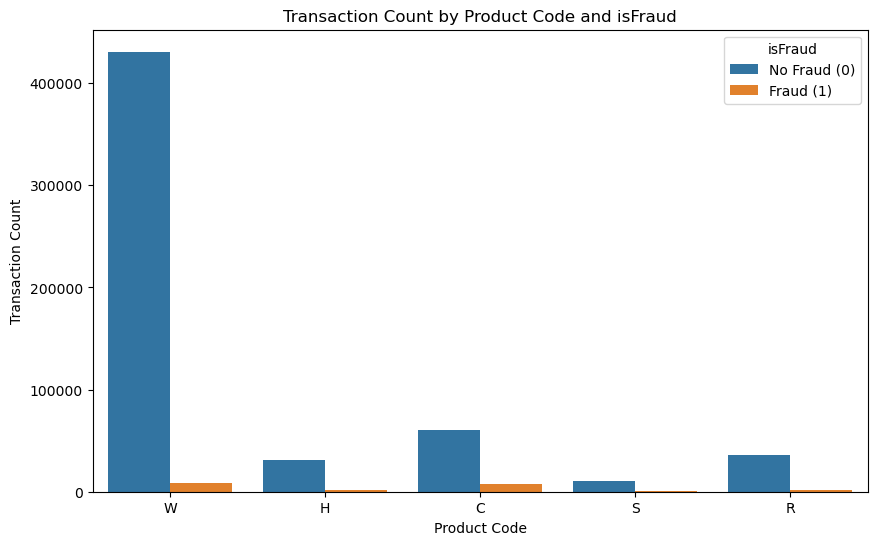

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot with hue based on 'isFraud'
sns.countplot(x='ProductCD', hue='isFraud', data=df_train)

# Set the title and axis labels
plt.title('Transaction Count by Product Code and isFraud')
plt.xlabel('Product Code')
plt.ylabel('Transaction Count')

# Customize the legend labels
plt.legend(title='isFraud', labels=['No Fraud (0)', 'Fraud (1)'])

# Show the plot
plt.show()


In [36]:
df_train['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express'], dtype=object)

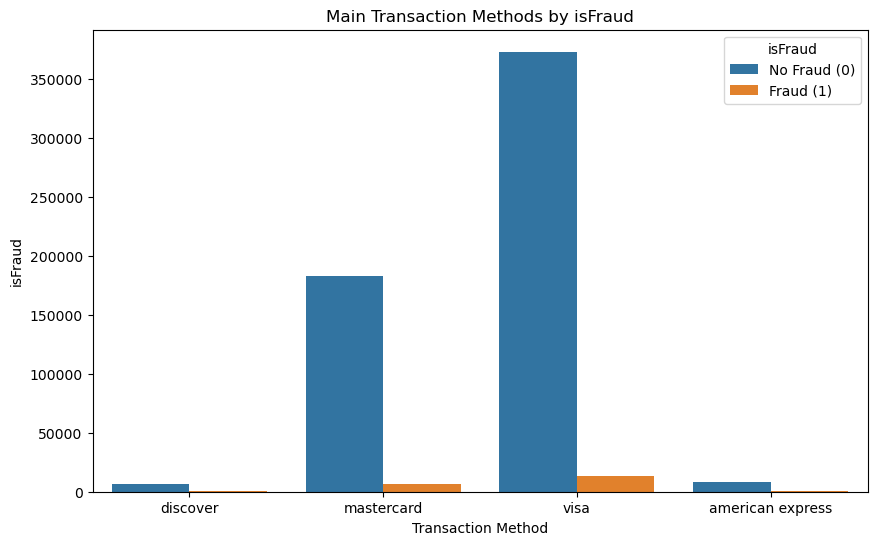

In [37]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot with hue based on 'isFraud'
sns.countplot(x='card4', hue='isFraud', data=df_train)

# Set the title and axis labels
plt.title('Main Transaction Methods by isFraud')
plt.xlabel('Transaction Method')
plt.ylabel('isFraud')

# Customize the legend labels
plt.legend(title='isFraud', labels=['No Fraud (0)', 'Fraud (1)'])

# Show the plot
plt.show()

In [38]:
df_train['card6'].unique()

array(['credit', 'debit', 'debit or credit', 'charge card'], dtype=object)

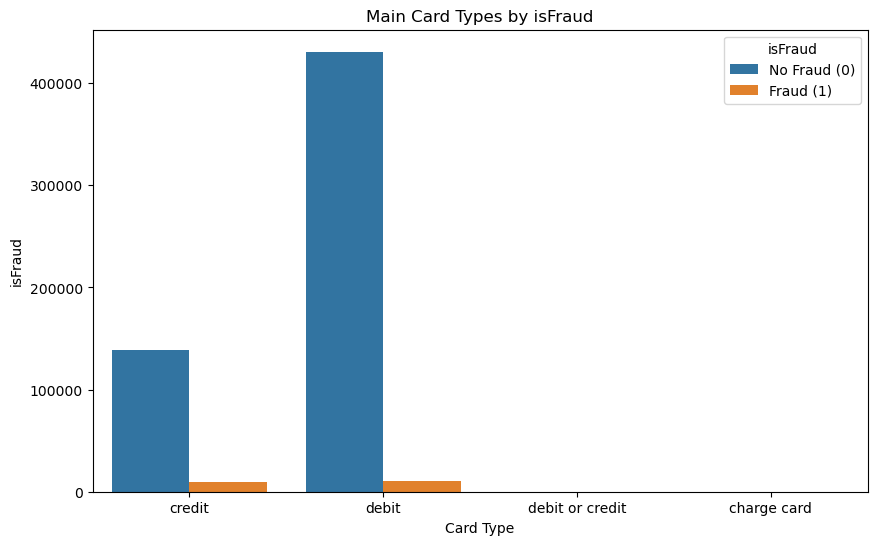

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot with hue based on 'isFraud'
sns.countplot(x='card6', hue='isFraud', data=df_train)

# Set the title and axis labels
plt.title('Main Card Types by isFraud')
plt.xlabel('Card Type')
plt.ylabel('isFraud')

# Customize the legend labels
plt.legend(title='isFraud', labels=['No Fraud (0)', 'Fraud (1)'])

# Show the plot
plt.show()

In [40]:
df_train['P_emaildomain'].unique()

array(['gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [41]:
df_train['P_emaildomain'].value_counts()

P_emaildomain
gmail.com           322811
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com   

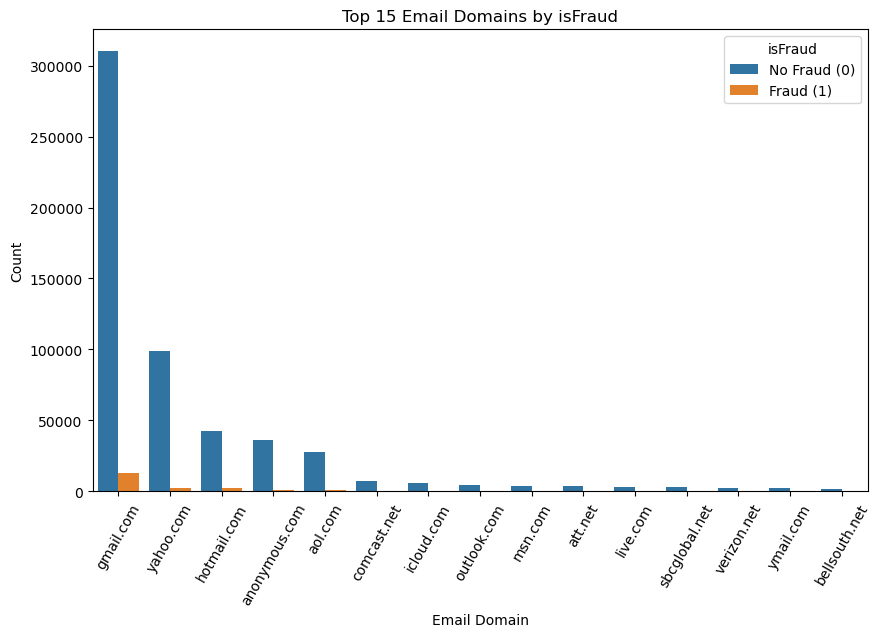

In [42]:
# Count the top 10 email domains
top_10_domains = df_train['P_emaildomain'].value_counts().nlargest(15).index

# Filter dataset to include only top 10 email domains
df_filtered = df_train[df_train['P_emaildomain'].isin(top_10_domains)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot with hue based on 'isFraud'
sns.countplot(x='P_emaildomain', hue='isFraud', data=df_filtered, order=top_10_domains)

# Set the title and axis labels
plt.title('Top 15 Email Domains by isFraud')
plt.xlabel('Email Domain')
plt.ylabel('Count')

# Customize the legend labels
plt.legend(title='isFraud', labels=['No Fraud (0)', 'Fraud (1)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [43]:
df_train['isFraud'].value_counts()

isFraud
0    569877
1     20663
Name: count, dtype: int64

In [44]:
df_train.shape

(590540, 106)

## Models

### Logistic Regression 

In [45]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [46]:
df_encoded = pd.get_dummies(df_train, columns=cat_cols, drop_first=True)

In [47]:
df_encoded

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V53,V54,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V79,V80,V81,V82,V83,V84,V85,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,0,68.50,13926,361.0,150.0,142.0,315.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,117.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000000,117.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,117.0,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,29.00,2755,404.0,150.0,102.0,325.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,59.00,4663,490.0,150.0,166.0,330.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,

In [48]:
X = df_encoded.drop(columns=['isFraud'])
y = df_encoded.iloc[:,0]


In [49]:
lr = LogisticRegression()
lr.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y,lr.predict(X))

0.9648440410471771

In [52]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Model Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    113975
           1       0.10      0.74      0.18      4133

    accuracy                           0.76    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.76      0.84    118108

AUC-ROC Score: 0.8249348512687936


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


False Alarm due to low precision 

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [55]:
accuracy_score(y_test,rf.predict(X_test))

0.9785704609340603

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(y_test,rf.predict(X_test))

0.45148802322767967

In [ ]:
# Upsampling the minority class
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Model Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.99      0.77      0.86    113975
           1       0.10      0.74      0.18      4133

    accuracy                           0.77    118108
   macro avg       0.55      0.76      0.52    118108
weighted avg       0.96      0.77      0.84    118108

AUC-ROC Score: 0.8277663817570072


In [59]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [60]:
recall_score(y_test,rf1.predict(X_test))

0.5059278974110816

| Class     | Logistic Regression Recall | Random Forest Recall |
|-----------|----------------------------|-----------------------|
| Fraud (1) | 0.74                       | 0.50                  |


### Future Scope: Enhancing Recall with Deep Learning

To further improve the recall score, especially for the minority (fraud) class, the following deep learning approaches will be explored:

#### 1. **Deep Neural Networks (DNN)**
- A fully connected feedforward neural network will be trained on the feature-engineered dataset.
- Useful for learning complex, non-linear relationships between features.
- Early stopping and dropout will be used to prevent overfitting.

#### 2. **1D Convolutional Neural Network (CNN1D)**
- CNN1D will be applied to capture **spatial patterns** across feature dimensions.
- Particularly useful if the input features are time-ordered or sequential in nature (e.g., transaction patterns).
- Can extract local feature combinations that might indicate fraud.

#### 3. **Adaptive Deep Neural Networks (ADNN)**
- ADNNs dynamically adjust their structure (e.g., number of layers or nodes) based on validation feedback.
- This adaptability may help focus learning on rare fraud patterns without manual tuning.
- A promising approach for handling high-dimensional, sparse, and noisy data.

#### 🔧 Training & Evaluation Plan:
- **SMOTE or class weights** will be used to handle class imbalance.
- Evaluation will focus on **Recall**, **AUC-ROC**, and **F1-Score**, prioritizing fraud detection.
- Experiments will be run with and without feature selection to study its impact.

#### Objective:
Improve the **Recall for Class 1 (Fraud)** beyond current baselines, aiming for a value above **0.80**, while maintaining a reasonable precision and overall AUC score.


# Stratified Sampling 
it splits the train and test data into same ratio of fraud and non_fraud transaction

In [62]:
from sklearn.model_selection import train_test_split

# Assume:
# - `df`: Your DataFrame with features + 'is_fraud' column (0/1)
# - `train`: Your training data (already loaded)

# # Step 1: Sample a subset for experimentation (stratified to keep fraud ratio)
# n_samples = min(int(1e5), df_encoded.shape[0])  # Cap at 100K samples
# train_subset = df_encoded.groupby('isFraud', group_keys=False).apply(
#     lambda x: x.sample(min(len(x), int(n_samples * len(df_encoded) / len(df_encoded))))
# )

# Step 2: Split into train/tune sets (stratified)
train_main, tune_dataset = train_test_split(
    df_encoded,
    test_size=.2,
    stratify=df_encoded['isFraud'],
    random_state=42
)

print(f"Fraud in train_main: {train_main['isFraud'].mean():.4f}")
print(f"Fraud in tune_dataset: {tune_dataset['isFraud'].mean():.4f}")

Fraud in train_main: 0.0350
Fraud in tune_dataset: 0.0350


In [ ]:
X_new = train_main.drop(columns=['isFraud'])
y_new = train_main['isFraud']

# Fitting Random Forest on Stratified Sample

In [178]:
rf1= RandomForestClassifier(class_weight='balanced',  max_depth=35)
rf1.fit(X_new,y_new)

RandomForestClassifier(class_weight='balanced', max_depth=35)

In [179]:
test_X = tune_dataset.drop(columns=['isFraud'])
test_y = tune_dataset['isFraud']

# Performance report of Random Forest

In [180]:
print(classification_report(test_y, rf1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.82      0.47      0.60      4133

    accuracy                           0.98    118108
   macro avg       0.90      0.73      0.79    118108
weighted avg       0.98      0.98      0.97    118108



# Calculating feature importances from Random Forest classifier

In [181]:
rf1.feature_importances_

array([5.27176672e-02, 4.14063277e-02, 3.46119779e-02, 1.16507908e-02,
       1.71041632e-02, 3.01005886e-02, 3.00006406e-02, 2.45617975e-02,
       1.68361693e-02, 1.11148985e-02, 1.47296503e-02, 1.10530649e-02,
       1.92212125e-02, 9.21693291e-03, 1.54042454e-02, 1.51446585e-02,
       9.58454098e-03, 4.20788267e-02, 3.66357031e-02, 2.08270590e-02,
       1.65087756e-02, 2.29957732e-02, 3.41409714e-03, 3.64891574e-03,
       2.90735420e-03, 3.19826182e-03, 3.18347010e-03, 7.46235762e-04,
       3.11756319e-03, 3.73762208e-03, 4.93571318e-04, 1.46270859e-03,
       6.62653384e-03, 1.18690579e-02, 1.51129456e-03, 5.08465706e-04,
       3.04122443e-03, 3.67663118e-03, 4.09334735e-03, 4.39543377e-03,
       9.59985836e-04, 6.41700502e-04, 1.59576826e-03, 8.47733531e-04,
       3.26280258e-03, 4.07367480e-03, 6.59091444e-04, 9.56582867e-04,
       1.48410952e-02, 1.47091309e-02, 6.30054901e-04, 1.35856792e-03,
       2.16313695e-03, 2.62098537e-03, 3.60976072e-03, 4.17267913e-03,
      

In [182]:
importances = rf1.feature_importances_
feature_names = X_new.columns

In [183]:
feature_ranks = pd.Series(importances, index=feature_names).sort_values(ascending=False)

In [184]:
feature_ranks

TransactionAmt                    5.271767e-02
C13                               4.207883e-02
card1                             4.140633e-02
C14                               3.663570e-02
card2                             3.461198e-02
                                      ...     
P_emaildomain_ptd.net             3.207466e-06
P_emaildomain_servicios-ta.com    2.038236e-06
P_emaildomain_live.fr             9.371236e-07
P_emaildomain_yahoo.co.jp         8.769198e-07
card6_debit or credit             2.781836e-07
Length: 169, dtype: float64

In [185]:
selected_features = feature_ranks.head(20).index.tolist()

In [186]:
selected_features

['TransactionAmt',
 'C13',
 'card1',
 'C14',
 'card2',
 'addr1',
 'C1',
 'C2',
 'D15',
 'D1',
 'C8',
 'V308',
 'card5',
 'C4',
 'V317',
 'D10',
 'V91',
 'C10',
 'C11',
 'V69']

In [187]:
X_sele = X_new[selected_features]

# Fitting Random Forest on selected Features only

In [188]:
rf3 = RandomForestClassifier(class_weight='balanced')
rf3.fit(X_sele,y_new)

RandomForestClassifier(class_weight='balanced')

# Performance report of Random Forest

In [190]:
print(classification_report(test_y, rf3.predict(test_X[selected_features])))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.82      0.50      0.62      4133

    accuracy                           0.98    118108
   macro avg       0.90      0.75      0.80    118108
weighted avg       0.98      0.98      0.98    118108



# Fitting Xgboost on selected Features only

In [201]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Define the model
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',  # Logarithmic loss function,
    'scale_pos_weight': 27,  
    'max_depth': 20,  # Max depth of tree
    'eta': 0.11,  # Learning rate
    'subsample': .8,  # Subsampling ratio
    'colsample_bytree': .6,  # Randomly sample features for each tree
}

# Train the model
model4 = xgb.XGBClassifier(**params, use_label_encoder=False)
model4.fit(X_sele,y_new)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:21:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.11, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

# Performance report of Xgboost

In [202]:
print(classification_report(test_y, model4.predict(test_X[selected_features])))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.70      0.70      0.70      4133

    accuracy                           0.98    118108
   macro avg       0.84      0.84      0.84    118108
weighted avg       0.98      0.98      0.98    118108



### LightGBM 
XGBoost is slower for bigger dataset, LightGBM which perform well when size is more than 100k.

In [205]:
import lightgbm as lgb

# Fitting Light Gradient-Boosting Machine on Stratified X_train(X_new)

In [232]:
params = {
    'objective': 'binary',               # Binary classification
    'metric': 'aucpr',                   # AUC-PR (better for imbalanced datasets)
    'boosting_type': 'gbdt',             # Gradient Boosting Decision Tree
    'is_unbalance': True,                # Handle class imbalance                   # Controls tree depth to prevent overfitting
    'learning_rate': 0.1,                # Controls the learning rate
    'num_leaves': 50,                    # Controls the number of leaves in each tree
    'n_estimators': 5000,                # Number of boosting rounds (trees)
    'subsample': 0.7,                    # Fraction of samples to use for each tree (for regularization)
    'colsample_bytree': 0.6,             # Fraction of features to use for each tree
    'min_child_samples': 20,             # Minimum number of samples per leaf (prevents overfitting)
    'verbosity': -1,                     # Suppresses output
}

# Step 4: Train LightGBM model
model = lgb.LGBMClassifier(**params)
model.fit(X_new, y_new,
          eval_set=[(test_X, test_y)])

LGBMClassifier(colsample_bytree=0.6, is_unbalance=True, metric='aucpr',
               n_estimators=5000, num_leaves=50, objective='binary',
               subsample=0.7, verbosity=-1)

# Performance Report on LBGM Classifier

In [233]:
print(classification_report(test_y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.78      0.75      0.76      4133

    accuracy                           0.98    118108
   macro avg       0.88      0.87      0.88    118108
weighted avg       0.98      0.98      0.98    118108



# Fitting the LGBMClassifier after performing hyper parameter tuning

In [258]:
params = {
    'objective': 'binary',
    'metric': 'aucpr',  # Keep PR-AUC as primary metric
    'boosting_type': 'gbdt',
    'scale_pos_weight': 20,  # More aggressive than is_unbalance (typically set to #neg/#pos)
    'learning_rate': 0.03,  # Slightly lower for better convergence
    'num_leaves': 31,  # Reduced to prevent overfitting
    'max_depth': -1,  # Let it grow deeper when needed
    'min_child_samples': 20,  # Lower than default (20 instead of 100)
    'min_child_weight': 0.001,  # Allows splits with small groups
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,  # L1 regularization
    'reg_lambda': 0.1,  # L2 regularization
    'n_estimators': 9000,  # Fewer trees with early stopping
    'verbosity': -1
}

# Step 4: Train LightGBM model
model1 = lgb.LGBMClassifier(**params)
model1.fit(X_new, y_new,
          eval_set=[(test_X, test_y)])

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.03, metric='aucpr',
               n_estimators=9000, objective='binary', reg_alpha=0.1,
               reg_lambda=0.1, scale_pos_weight=20, subsample=0.8,
               verbosity=-1)

# Performance Report on LBGM Classifier after parameter tuning

In [260]:
print(classification_report(test_y, model1.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    113975
           1       0.59      0.80      0.68      4133

    accuracy                           0.97    118108
   macro avg       0.79      0.89      0.83    118108
weighted avg       0.98      0.97      0.98    118108



# Using Deep ANN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adagrad,Adam  # Correct import

def build_fraud_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization() ,     # Faster training and to minimize internal covariat shift
        layers.Dropout(0.1),  # Reduce overfitting

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model


# Performing standardization

In [297]:
sc_ = StandardScaler()

In [298]:
X_new_trs = sc_.fit_transform(X_new)

In [305]:
y_new_trs = y_new.values

In [352]:
model_ann = build_fraud_model(input_dim=X_new_trs.shape[1])

history = model_ann.fit(
    X_new_trs,y_new_trs,
    epochs=100,
    batch_size=512,
    validation_data= (test_X_trs,test_y),
    class_weight={0: 1, 1: 8},
    
    # callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - auc: 0.7864 - loss: 0.5856 - precision: 0.1500 - recall: 0.4699 - val_auc: 0.8688 - val_loss: 0.2332 - val_precision: 0.2396 - val_recall: 0.5906
Epoch 2/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - auc: 0.8740 - loss: 0.4289 - precision: 0.2775 - recall: 0.5415 - val_auc: 0.8853 - val_loss: 0.1988 - val_precision: 0.2802 - val_recall: 0.5918
Epoch 3/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - auc: 0.8936 - loss: 0.3927 - precision: 0.3101 - recall: 0.5786 - val_auc: 0.9029 - val_loss: 0.1774 - val_precision: 0.3437 - val_recall: 0.6071
Epoch 4/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - auc: 0.9072 - loss: 0.3659 - precision: 0.3390 - recall: 0.6063 - val_auc: 0.9059 - val_loss: 0.1669 - val_precision: 0.3922 - val_recall: 0.5831
Epoch 5/100
923/923 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - auc: 0.9157 - loss: 0.3530 - precision: 0.3642 - recall: 0.6288 - val_auc: 0.9131 - val_loss: 0.1895 - val_precision: 0.3127 - val_

In [315]:
test_X_trs = sc_.transform(test_X)

# Performance report of DNN

In [355]:
print(classification_report(test_y, model_ann.predict(test_X_trs)>=.7))

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 2s 604us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.71      0.70      0.71      4133

    accuracy                           0.98    118108
   macro avg       0.85      0.85      0.85    118108
weighted avg       0.98      0.98      0.98    118108



In [356]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adagrad,Adam  # Correct import

def build_fraud_model_1(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    return model


In [ ]:
model_ann_1 = build_fraud_model_1(input_dim=X_new_trs.shape[1])

history_1 = model_ann_1.fit(
    X_new_trs,y_new_trs,
    epochs=400,
    batch_size=32,
    validation_data= (test_X_trs,test_y),
    class_weight={0: 1, 1: 8},
    
    # callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/400
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - auc: 0.7822 - loss: 0.5678 - precision: 0.1584 - recall: 0.3831 - val_auc: 0.8581 - val_loss: 0.2048 - val_precision: 0.4823 - val_recall: 0.2766
Epoch 2/400
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - auc: 0.8539 - loss: 0.4555 - precision: 0.2657 - recall: 0.4845 - val_auc: 0.8776 - val_loss: 0.2234 - val_precision: 0.3036 - val_recall: 0.5565
Epoch 3/400
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - auc: 0.8746 - loss: 0.4229 - precision: 0.3016 - recall: 0.5366 - val_auc: 0.8874 - val_loss: 0.1532 - val_precision: 0.4818 - val_recall: 0.4733
Epoch 4/400
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - auc: 0.8880 - loss: 0.4003 - precision: 0.3283 - recall: 0.5655 - val_auc: 0.8906 - val_loss: 0.2272 - val_precision: 0.3025 - val_recall: 0.6230
Epoch 5/400
14764/14764 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - auc: 0.8945 - loss: 0.3860 - precision: 0.3417 - recall: 0.5761 - val_auc: 0.8955 - val_loss: 0.2179 - val_precision

In [364]:
print(classification_report(test_y, model_ann_1.predict(test_X_trs)>=.76))

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 2s 560us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.70      0.70      0.70      4133

    accuracy                           0.98    118108
   macro avg       0.84      0.84      0.84    118108
weighted avg       0.98      0.98      0.98    118108



## Fraud Detection Model Performance Report

### Random Forest

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.98 | 1.00 | 0.99 | 113975 |
| 1 | 0.82 | 0.47 | 0.60 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.98 |
| Macro Avg | Precision: 0.90, Recall: 0.73, F1-score: 0.79 |
| Weighted Avg | Precision: 0.98, Recall: 0.98, F1-score: 0.97 |



### Random Forest (With Only Important Features)

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.98 | 1.00 | 0.99 | 113975 |
| 1 | 0.82 | 0.50 | 0.62 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.98 |
| Macro Avg | Precision: 0.90, Recall: 0.75, F1-score: 0.80 |
| Weighted Avg | Precision: 0.98, Recall: 0.98, F1-score: 0.98 |



### XGBoost (With Important Features)

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.99 | 0.99 | 0.99 | 113975 |
| 1 | 0.70 | 0.70 | 0.70 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.98 |
| Macro Avg | Precision: 0.84, Recall: 0.84, F1-score: 0.84 |
| Weighted Avg | Precision: 0.98, Recall: 0.98, F1-score: 0.98 |

=

### LGBM (On Stratified X)

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.99 | 0.99 | 0.99 | 113975 |
| 1 | 0.78 | 0.75 | 0.76 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.98 |
| Macro Avg | Precision: 0.88, Recall: 0.87, F1-score: 0.88 |
| Weighted Avg | Precision: 0.98, Recall: 0.98, F1-score: 0.98 |



### LGBM (After Parameter Tuning)

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.99 | 0.98 | 0.99 | 113975 |
| 1 | 0.59 | 0.80 | 0.68 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.97 |
| Macro Avg | Precision: 0.79, Recall: 0.89, F1-score: 0.83 |
| Weighted Avg | Precision: 0.98, Recall: 0.97, F1-score: 0.98 |



### Deep Neural Network (DNN)

**Performance Metrics:**

| Class | Precision | Recall | F1-score | Support |
|---|---|---|---|---|
| 0 | 0.99 | 0.99 | 0.99 | 113975 |
| 1 | 0.71 | 0.70 | 0.71 | 4133 |

**Overall Metrics:**

| Metric | Score |
|---|---|
| Accuracy | 0.98 |
| Macro Avg | Precision: 0.85, Recall: 0.85, F1-score: 0.85 |
| Weighted Avg | Precision: 0.98, Recall: 0.98, F1-score: 0.98 |


## Comparison of Models

| Model | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) | Accuracy |
|---|---|---|---|---|
| Random Forest | 0.82 | 0.47 | 0.60 | 0.98 |
| Random Forest (Imp Features) | 0.82 | 0.50 | 0.62 | 0.98 |
| XGBoost (Imp Features) | 0.70 | 0.70 | 0.70 | 0.98 |
| LGBM (Stratified X) | 0.78 | 0.75 | 0.76 | 0.98 |
| LGBM (Tuned) | 0.59 | 0.80 | 0.68 | 0.97 |
| DNN | 0.71 | 0.70 | 0.71 | 0.98 |

### Observations:
- **Random Forest** performs well but struggles with recall.
- **XGBoost** has balanced recall and precision but isn't the best in F1-score.
- **LGBM** performs better after tuning, but precision drops.
- **DNN** achieves a good balance but needs more tuning for higher precision.



# **Best Model for Real-Time Fraud Detection**

The **best model** depends on your objective:  

- **If you prioritize high recall (catching more fraud cases)** → **LightGBM (Tuned)**  
  - Recall: **0.80**  
  - Precision: **0.59**  

- **If you want a balanced approach (good precision & recall)** → **XGBoost**  
  - Recall: **0.70**  
  - Precision: **0.70**  

- **If you need real-time speed & interpretability** → **Random Forest**  
  - Precision: **0.82**  
  - Recall: **0.50**  

- **If you have powerful GPUs and want deep learning advantages** → **DNN (Neural Network)**  
  - Precision: **0.71**  
  - Recall: **0.70**  

---   

## **Final Recommendation**  
- If you want to **maximize fraud detection (high recall)** → **LightGBM (Tuned)**
- If you want a **balanced model for precision & recall** → **LightGBM(stratified)**
- If you want best model **to capture non_linearity** → **DNN**

### **Best Overall: LightGBM**  
**LightGBM** is the best choice for **fraud detection** as it balances recall and precision, ensuring fraud cases are caught while minimizing false positives.  